## Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import math
import tensorflow
from tensorflow import keras
from skimage.transform import resize
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
import nibabel as nib
from metrics import multi_class_dice, multiclass_dice_loss, dice_background, dice_LVbloodpool, dice_RVbloodpool,dice_LVmyo, dice_LVmyoedema, dice_LVmyoscars

In [2]:
# Getting a three-sequence CMR

img_ch1=nib.load("samples\myops_training_119_C0.nii.gz")
img_ch2=nib.load("samples\myops_training_119_DE.nii.gz")
img_ch3=nib.load("samples\myops_training_119_T2.nii.gz")
img_ch1=img_ch1.get_fdata()
img_ch2=img_ch2.get_fdata()
img_ch3=img_ch3.get_fdata()
img1=img_ch1[:,:,3]
img2=img_ch2[:,:,3]
img3=img_ch3[:,:,3]
image = np.stack((img1,img2,img3), axis=-1)
image=image.reshape(1,image.shape[0],image.shape[1],3)
print(image.shape)

(1, 485, 480, 3)


In [3]:
#Cropping sample with 256 x 256 pixels using the center point

width=image.shape[1]
height=image.shape[2]
new_width=256
new_height=256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2
left=math.ceil(left)
right=math.ceil(right)
top=math.ceil(top)
bottom=math.ceil(bottom)
image=image[:,top:bottom,left:right,:]
print(image.shape)

#Normalizing
image=image[0,:,:,:]/np.max(image[0,:,:,:])
image=image.reshape(1,image.shape[0],image.shape[1],3)

(1, 256, 256, 3)


In [4]:
model=load_model('RUNet.h5', compile=False)
model.compile(optimizer = tensorflow.keras.optimizers.Adam(lr = 0.001), loss = multiclass_dice_loss, 
              metrics = [dice_background,dice_LVbloodpool,dice_RVbloodpool,dice_LVmyo, dice_LVmyoedema, dice_LVmyoscars, multi_class_dice])

C:\Users\Elif\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [5]:
prediction=model.predict(image)

In [6]:
image_width=image.shape[1]
image_height=image.shape[2]
preds = np.zeros((image.shape[0], image_width, image_height)).astype('uint16')
preds[prediction[:,:,:,0]>0.5]=0
preds[prediction[:,:,:,1]>0.5]=500
preds[prediction[:,:,:,2]>0.5]=600 
preds[prediction[:,:,:,3]>0.5]=200
preds[prediction[:,:,:,4]>0.5]=1220 
preds[prediction[:,:,:,5]>0.5]=2221

Text(0.5, 0, 'predicted mask')

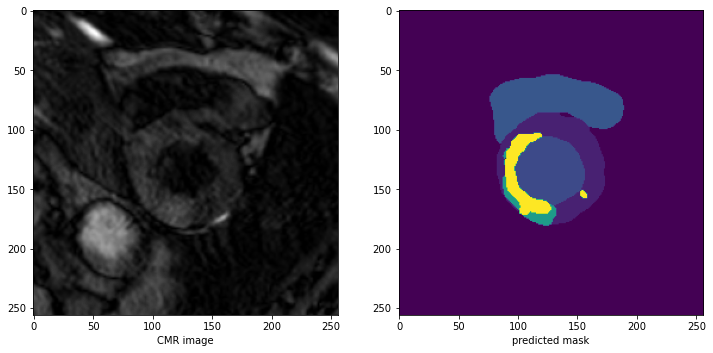

In [7]:
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,2], cmap='gray')
plt.xlabel("CMR image")
plt.subplot(1,2,2)
plt.imshow(preds[0,:,:])
plt.xlabel("predicted mask")